In [51]:
import numpy as np
import pandas as pd

In [52]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df=pd.read_csv('/content/drive/MyDrive/cleaned_full_data.csv')
df.head()

,Unnamed: 0,restaurant,url,distance,star,num_reviews,city,price_range,category_1,category_2
0,0,Sector 17,https://www.doordash.com/store/884779/?pickup=...,0.90,4.0,640.0,Branpton,$$,Indian,Wraps
1,1,Golden Palace Restaurant,https://www.doordash.com/store/332454/?pickup=...,2.00,4.0,301.0,Branpton,$$,Chinese,Chicken
2,2,McDonald's,https://www.doordash.com/store/1140537/?pickup...,1.00,4.2,890.0,Branpton,$$,Bakery,Chicken
3,3,San Francisco Place,https://www.doordash.com/store/205349/?pickup=...,0.40,4.4,109.0,Branpton,$,Italian,Sandwiches
4,4,THE BURGER BROS,https://www.doordash.com/store/940617/?pickup=...,0.09,4.5,481.0,Branpton,$$,Fast Food,Sandwiches


2. Data characteristics

In [54]:
#calculate how many rows and columns
df.shape

(3290, 10)

In [55]:
# calculate total non_null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3290 non-null   int64  
 1   restaurant   3290 non-null   object 
 2   url          3290 non-null   object 
 3   distance     3290 non-null   float64
 4   star         3010 non-null   float64
 5   num_reviews  2620 non-null   float64
 6   city         3290 non-null   object 
 7   price_range  3290 non-null   object 
 8   category_1   3290 non-null   object 
 9   category_2   3182 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 257.2+ KB


In [56]:
#without handling null value to calculate count,mean,std,min,25%,50%,
#75% and max for each numeric columns
df.describe()

,Unnamed: 0,distance,star,num_reviews
count,3290.000000,3290.000000,3010.00000,2620.000000
mean,1644.500000,5.039404,4.45103,570.441221
std,949.885519,9.048907,0.42168,1278.779974
min,0.000000,0.010000,1.00000,10.000000
25%,822.250000,0.500000,4.30000,57.000000
50%,1644.500000,1.000000,4.50000,182.000000
75%,2466.750000,1.600000,4.70000,560.000000
max,3289.000000,30.000000,5.00000,21000.000000


In [57]:
#calculate the duplicate value
df.duplicated().any()

False

In [58]:
# to get data type
df.dtypes

Unnamed: 0       int64
restaurant      object
url             object
distance       float64
star           float64
num_reviews    float64
city            object
price_range     object
category_1      object
category_2      object
dtype: object

to doing separate the columns for their data type. And their total columns

In [59]:
#here price_range, star,Unnamed: 0,  are not any type of data
def identify_feature_types(dataframe):
    numerical_features = dataframe.select_dtypes(include=['int', 'float']).columns.tolist()
    categorical_features = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

     # Remove 'price_range' from the categorical_features list if it exists
    if 'price_range' in categorical_features:
        categorical_features.remove('price_range')

    # Remove 'star' and 'Unnamed: 0' from the numerical_features list if they exist
    if 'star' in numerical_features or 'Unnamed: 0' in numerical_features:
        numerical_features = [feat for feat in numerical_features if feat not in ['star', 'Unnamed: 0']]


    text_features = []  # Add your text feature column names here if applicable
    date_features = []  # Add your date feature column names here if applicable
    boolean_features = []  # Add your boolean feature column names here if applicable
    geospatial_features = []  # Add your geospatial feature column names here if applicable

    feature_types = {
        'Numerical Features': numerical_features,
        'Categorical Features': categorical_features,
        'Text Features': text_features,
        'Date and Time Features': date_features,
        'Boolean Features': boolean_features,
        'Geospatial Features': geospatial_features
    }

    return feature_types

# Identify the feature types in the DataFrame
feature_types = identify_feature_types(df)

# Print the feature names for each type
for feature_type, features in feature_types.items():
    print(f"{feature_type} : {features} total_number: {len(features)}")

Numerical Features : ['distance', 'num_reviews'] total_number: 2
Categorical Features : ['restaurant', 'url', 'city', 'category_1', 'category_2'] total_number: 5
Text Features : [] total_number: 0
Date and Time Features : [] total_number: 0
Boolean Features : [] total_number: 0
Geospatial Features : [] total_number: 0


In [60]:
# Compute correlations
corr_matrix = df[['distance', 'num_reviews']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
             distance  num_reviews
distance     1.000000    -0.016785
num_reviews -0.016785     1.000000


Handling The Missing Data

In [61]:
# calculate null values by sort
df.isnull().sum().sort_values(ascending=False)

num_reviews    670
star           280
category_2     108
Unnamed: 0       0
restaurant       0
url              0
distance         0
city             0
price_range      0
category_1       0
dtype: int64

<Axes: >

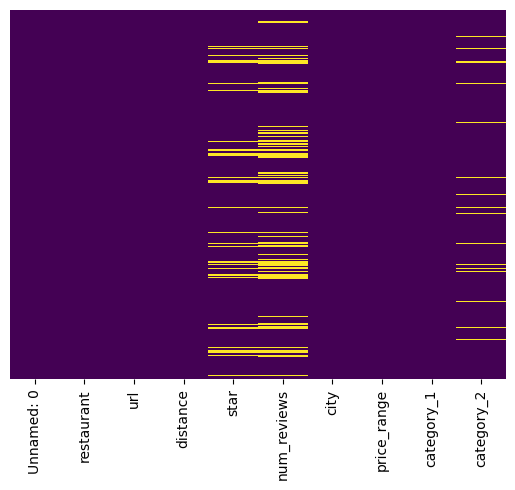

In [62]:
import seaborn as sns
#Here the 'virdis' color is the null of the column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
#here count the price range
print('Count of price range across Canada')
df['price_range'].value_counts()

Count of price range across Canada


$$      2962
$        308
$$$       17
$$$$       3
Name: price_range, dtype: int64

In [64]:
#we remove the category_2 cause it was categorycal data
df.drop('category_2',axis=1,inplace=True)

In [65]:
#here drope a column
df.shape

(3290, 9)

<Axes: >

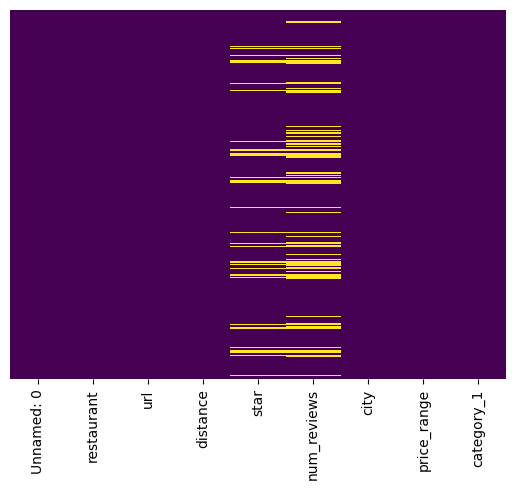

In [66]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
df.isnull().sum()

Unnamed: 0       0
restaurant       0
url              0
distance         0
star           280
num_reviews    670
city             0
price_range      0
category_1       0
dtype: int64

In [68]:
# replace with arbitrary number or text
mean_star=df['star'].mean()
mean_num_reviews=df['num_reviews'].mean()
print(mean_star)
print(mean_num_reviews)


4.451029900332227
570.4412213740458


In [69]:
df['star'].fillna(mean_star ,inplace=True)
df['num_reviews'].fillna(mean_num_reviews, inplace=True)

In [70]:
df.isnull().sum()

Unnamed: 0     0
restaurant     0
url            0
distance       0
star           0
num_reviews    0
city           0
price_range    0
category_1     0
dtype: int64

<Axes: >

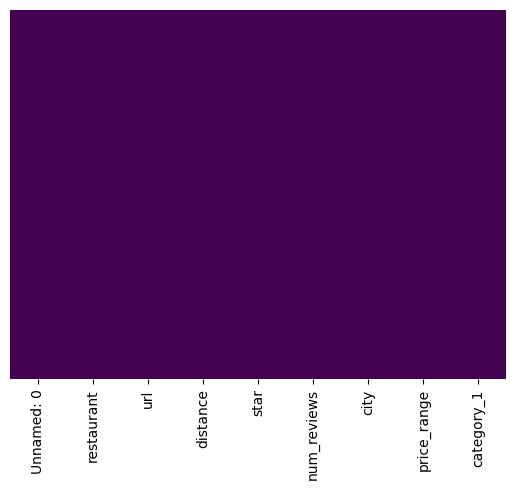

In [71]:
#there is no missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

3. Explorator Data Analysis

In [72]:
#(i)Total Number of restaurants in Each City
#total restarant for each city
restaurant_counts=df['city'].value_counts()
print(restaurant_counts)

Toronto      843
Vancouver    694
Montreal     568
Calgary      367
Edmonton     265
Ottawa       238
Winnipeg     197
Branpton     118
Name: city, dtype: int64


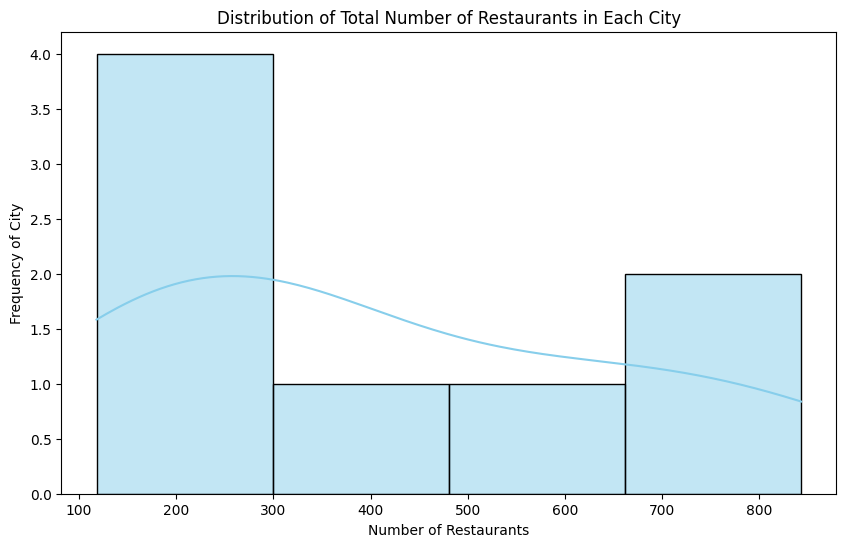

In [73]:
import matplotlib.pyplot as plt
# Plot the histogram(118-300) number of restaurants in  4 cites
plt.figure(figsize=(10, 6))
sns.histplot(restaurant_counts, kde=True, color='skyblue')  # Use histplot from seaborn
plt.xlabel('Number of Restaurants')
plt.ylabel('Frequency of City')
plt.title('Distribution of Total Number of Restaurants in Each City')
plt.show()


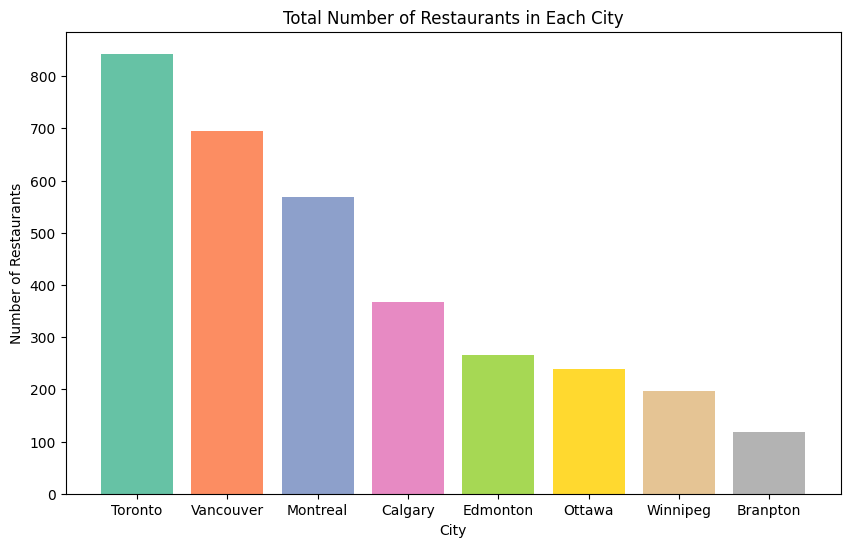

In [74]:
#Bar Chart for xlabel->total_restarants & ylabel->city
import matplotlib.pyplot as plt
import seaborn as sns

# Create a random color palette with the number of colors equal to the number of cities
num_cities = len(restaurant_counts)
colors = sns.color_palette('Set2', n_colors=num_cities)

plt.figure(figsize=(10,6))
plt.bar(restaurant_counts.index,restaurant_counts.values,color=colors)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Total Number of Restaurants in Each City')
plt.show()

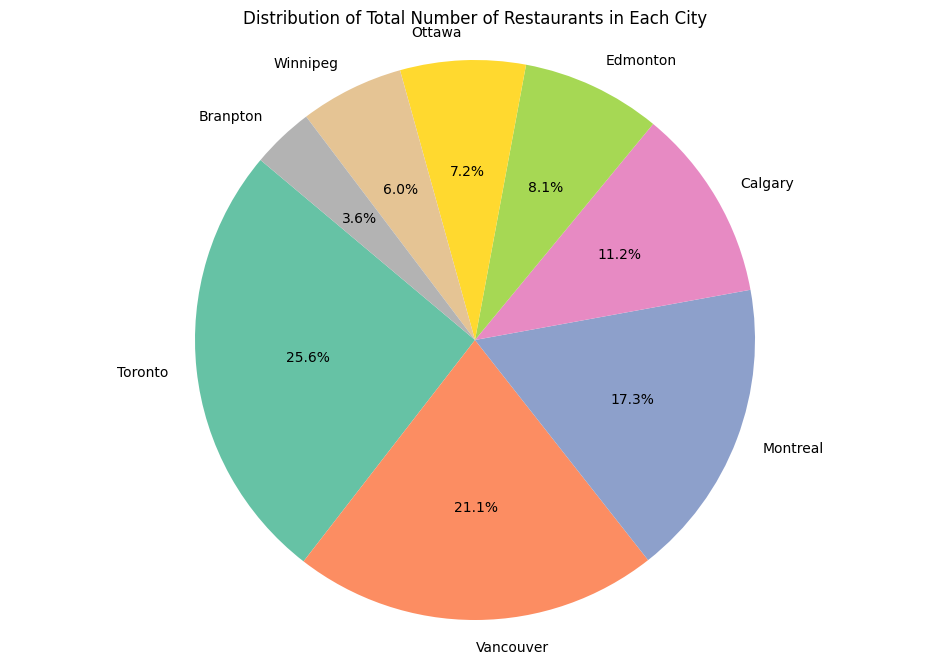

In [75]:
import matplotlib.pyplot as plt
# Plot the pie chart total number of restaurants in city
plt.figure(figsize=(12, 8))
plt.pie(restaurant_counts, labels=restaurant_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Distribution of Total Number of Restaurants in Each City')
plt.show()

In [76]:
#Popular food in canada
food_count_in_canada=df['category_1'].value_counts()
food_count_in_canada=food_count_in_canada[food_count_in_canada>50]
print(food_count_in_canada)

Chinese       198
Japanese      185
Italian       152
Indian        121
Burgers       120
Mexican       111
Pizza         103
Sandwiches     92
American       88
Cafe           86
Vietnamese     78
Breakfast      76
Bakery         66
Korean         62
Chicken        61
Salads         57
Name: category_1, dtype: int64


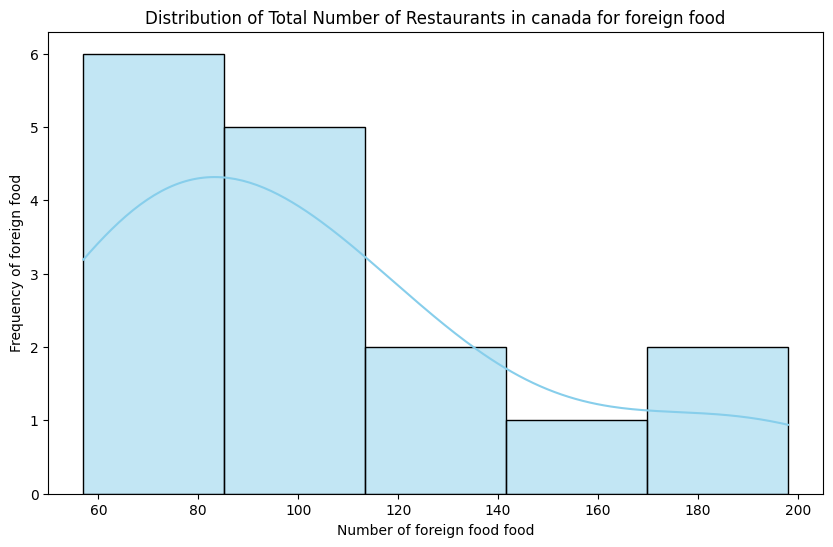

In [77]:
# Plot the histogram(57-86) number of restaurants in  6 foreign food
plt.figure(figsize=(10, 6))
sns.histplot(food_count_in_canada, kde=True, color='skyblue')  # Use histplot from seaborn
plt.xlabel("Number of foreign food food")
plt.ylabel("Frequency of foreign food")
plt.title('Distribution of Total Number of Restaurants in canada for foreign food')
plt.show()

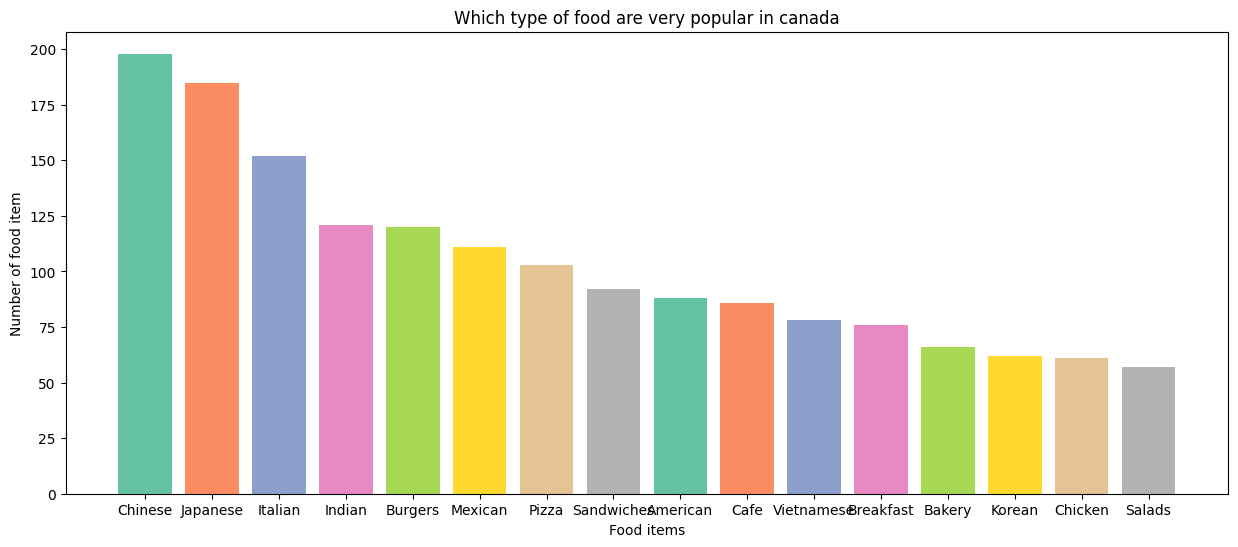

In [78]:
#Bar cahrt for popular food for canada
plt.figure(figsize=(15,6))
plt.bar(food_count_in_canada.index,food_count_in_canada.values,color=colors)
plt.xlabel('Food items')
plt.ylabel('Number of food item')
plt.title('Which type of food are very popular in canada')
plt.show()

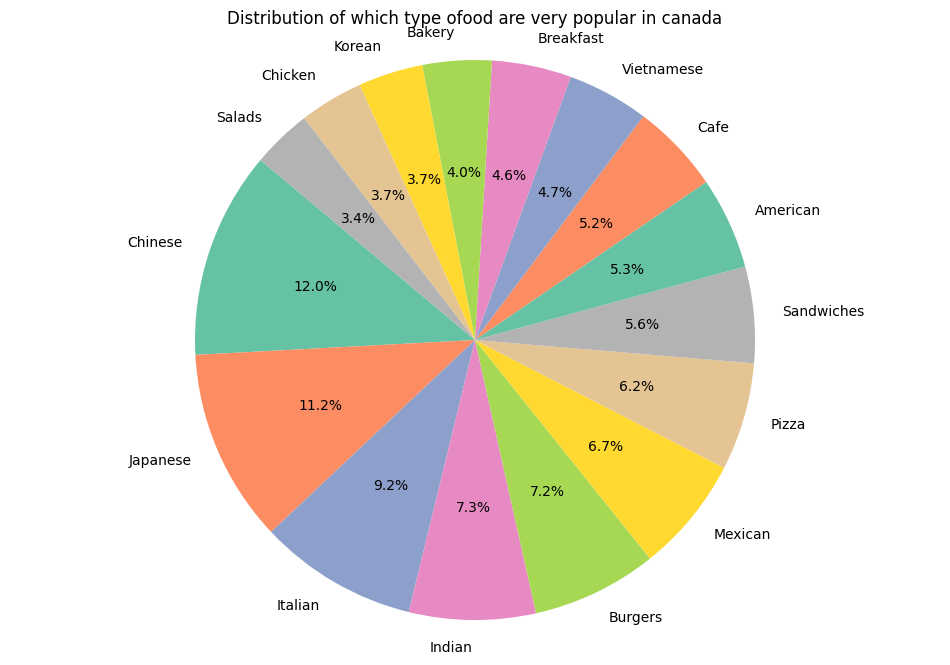

In [79]:
# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(food_count_in_canada, labels=food_count_in_canada.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Distribution of which type ofood are very popular in canada')
plt.show()

In [80]:
#sort the num_reviews_count_by_city
reviews_count_by_city=df.groupby('city')['num_reviews'].sum().sort_values(ascending=False)
print(reviews_count_by_city)

city
Vancouver    577555.445802
Toronto      413119.509924
Calgary      268274.296183
Montreal     234595.006107
Winnipeg     146230.030534
Edmonton     109475.267176
Ottawa        85483.120611
Branpton      42018.941985
Name: num_reviews, dtype: float64


In [81]:
#no need histogram

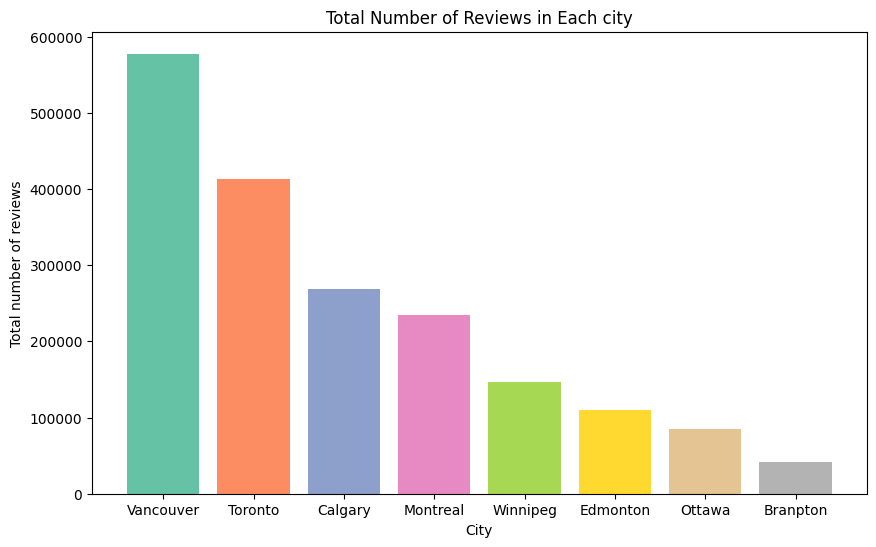

In [82]:
#Bar cahrt for city & num_reviews_count_by_city
plt.figure(figsize=(10,6))
plt.bar(reviews_count_by_city.index,reviews_count_by_city.values,color=colors)
plt.xlabel('City')
plt.ylabel('Total number of reviews')
plt.title('Total Number of Reviews in Each city')
plt.show()

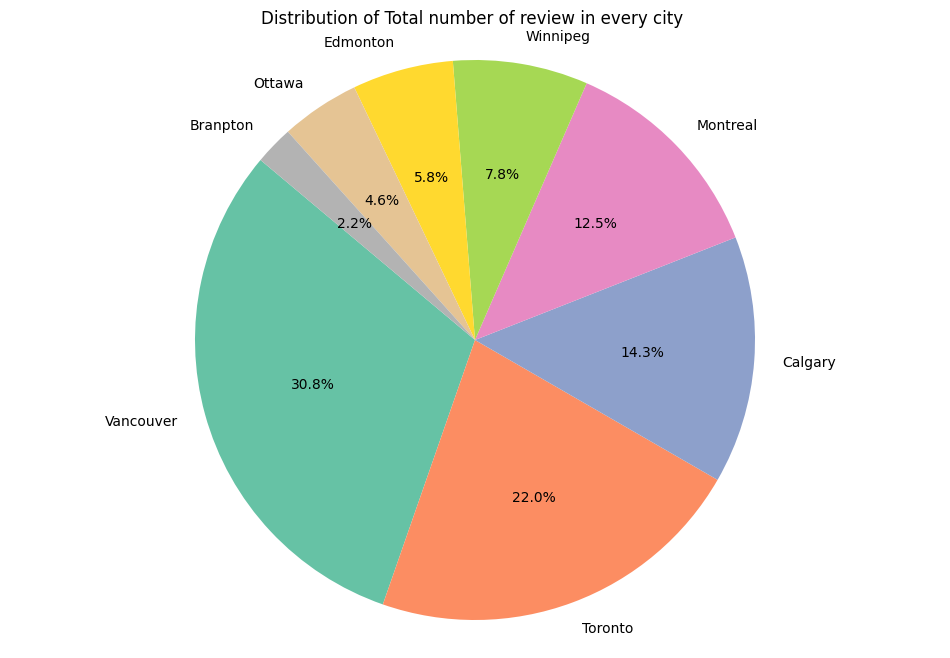

In [83]:
# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(reviews_count_by_city, labels=reviews_count_by_city.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Distribution of Total number of review in every city ')
plt.show()

In [84]:
#sort the mean_star_count_by_city
mean_star_by_city=df.groupby('city')['star'].mean().sort_values(ascending=False)
print(mean_star_by_city)

city
Vancouver    4.542428
Winnipeg     4.480504
Calgary      4.479770
Toronto      4.441331
Montreal     4.422026
Ottawa       4.399281
Edmonton     4.381965
Branpton     4.243273
Name: star, dtype: float64


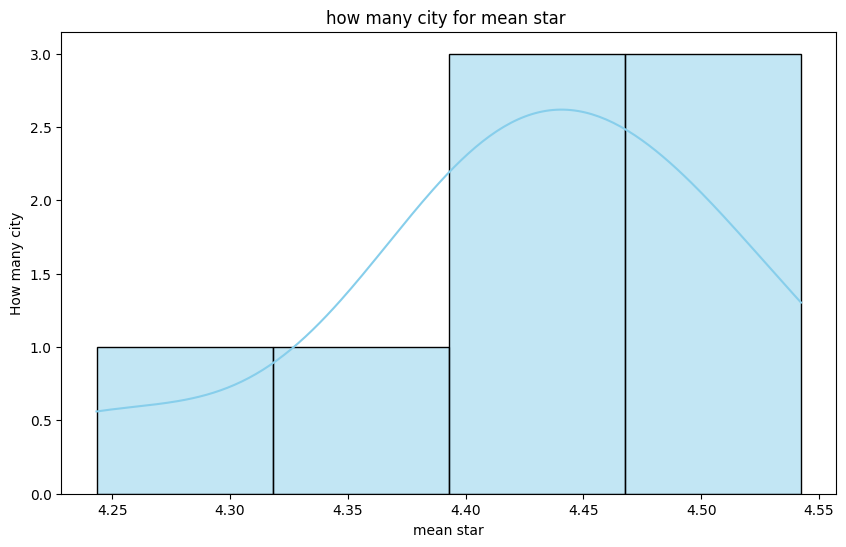

In [85]:
# Plot the histogram(4.24-4.38) mean star has 1 city
plt.figure(figsize=(10, 6))
sns.histplot(mean_star_by_city, kde=True, color='skyblue')  # Use histplot from seaborn
plt.xlabel("mean star")
plt.ylabel("How many city")
plt.title('how many city for mean star ')
plt.show()

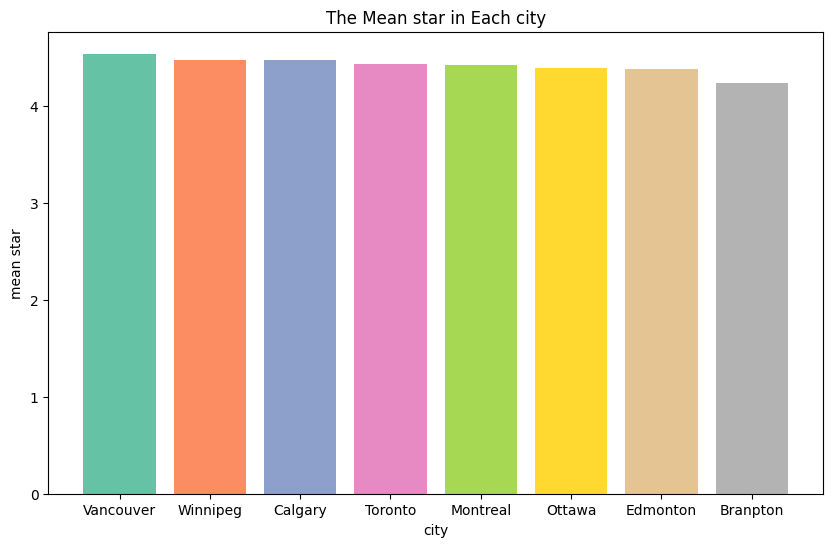

In [86]:
#Bar cahrt for city & mean_star_count_by_city
plt.figure(figsize=(10,6))
plt.bar(mean_star_by_city.index,mean_star_by_city.values,color=colors)
plt.xlabel('city')
plt.ylabel('mean star')
plt.title('The Mean star in Each city')
plt.show()

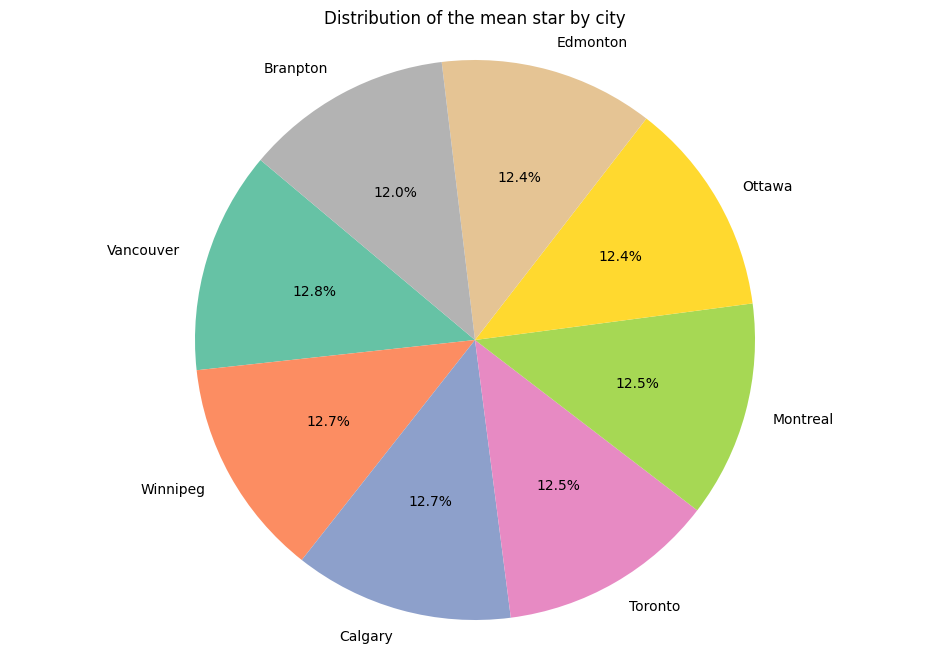

In [87]:
# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(mean_star_by_city, labels=mean_star_by_city.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Distribution of the mean star by city')
plt.show()

In [88]:
#sort the mean_distance_by_city
mean_distance_by_city=df.groupby('city')['distance'].mean().sort_values(ascending=False)
print(mean_distance_by_city)

city
Winnipeg     15.019086
Ottawa       14.771429
Montreal     14.399014
Branpton      1.035254
Toronto       0.924757
Edmonton      0.786755
Calgary       0.781090
Vancouver     0.763343
Name: distance, dtype: float64


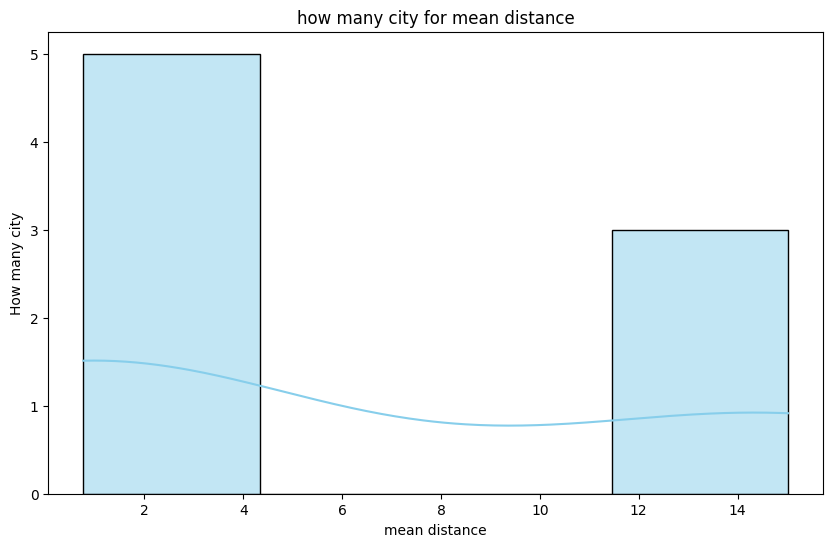

In [89]:
# Plot the histogram(0.76-5) mean distance has 5 city
plt.figure(figsize=(10, 6))
sns.histplot(mean_distance_by_city, kde=True, color='skyblue')  # Use histplot from seaborn
plt.xlabel("mean distance")
plt.ylabel("How many city")
plt.title('how many city for mean distance')
plt.show()

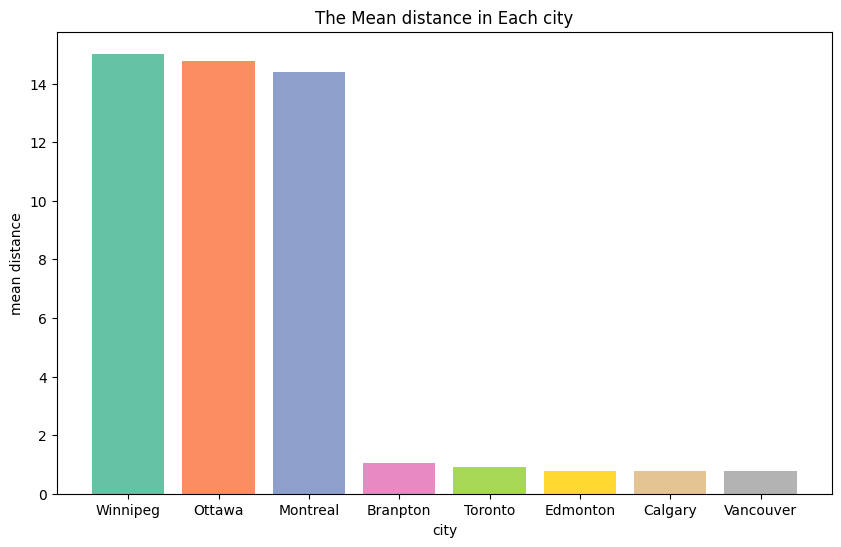

In [90]:
# Bar cahrt for city & mean_distance for each city
plt.figure(figsize=(10,6))
plt.bar(mean_distance_by_city.index,mean_distance_by_city.values,color=colors)
plt.xlabel('city')
plt.ylabel('mean distance')
plt.title('The Mean distance in Each city')
plt.show()

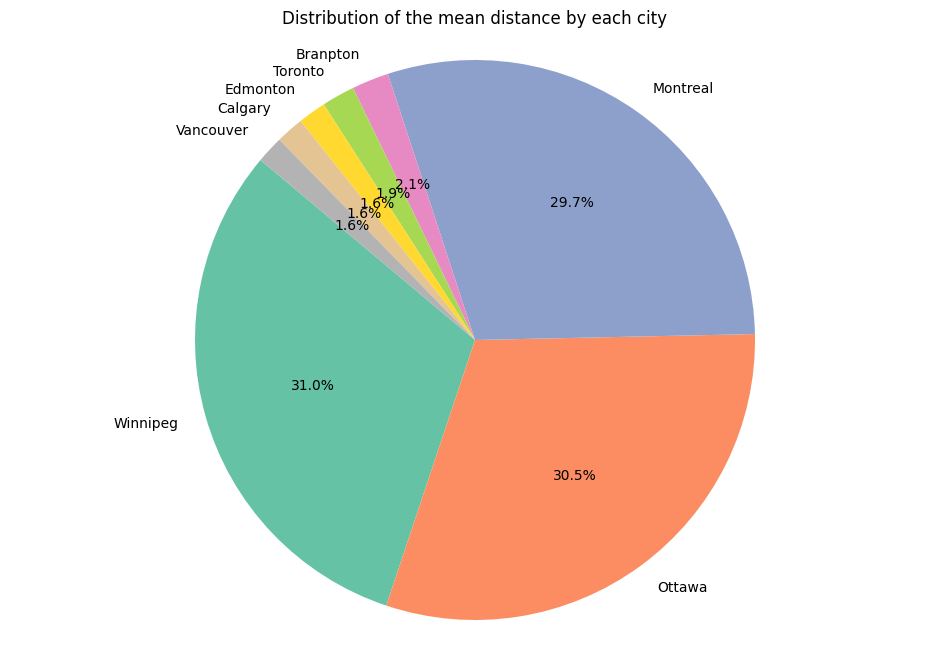

In [91]:
# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(mean_distance_by_city, labels=mean_distance_by_city.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Distribution of the mean distance by each city')
plt.show()

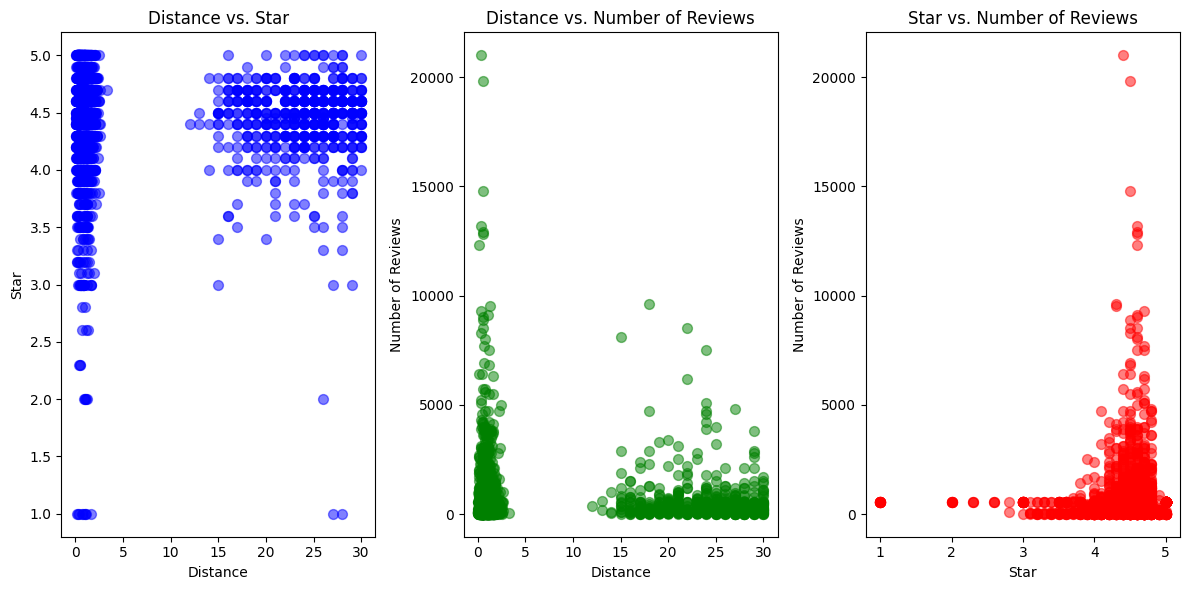

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df' containing restaurant data
# If not, load the data into 'df' using your preferred method

# Extract the 'distance', 'star', and 'num_reviews' columns from the DataFrame
distance_data = df['distance']
star_data = df['star']
num_reviews_data = df['num_reviews']

# Plot the three scatter plots in one frame
plt.figure(figsize=(12, 6))

# Scatter plot for 'distance' vs. 'star'
plt.subplot(1, 3, 1)
plt.scatter(distance_data, star_data, s=50, alpha=0.5, c='blue')
plt.xlabel('Distance')
plt.ylabel('Star')
plt.title('Distance vs. Star')

# Scatter plot for 'distance' vs. 'num_reviews'
plt.subplot(1, 3, 2)
plt.scatter(distance_data, num_reviews_data, s=50, alpha=0.5, c='green')
plt.xlabel('Distance')
plt.ylabel('Number of Reviews')
plt.title('Distance vs. Number of Reviews')

# Scatter plot for 'star' vs. 'num_reviews'
plt.subplot(1, 3, 3)
plt.scatter(star_data, num_reviews_data, s=50, alpha=0.5, c='red')
plt.xlabel('Star')
plt.ylabel('Number of Reviews')
plt.title('Star vs. Number of Reviews')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()


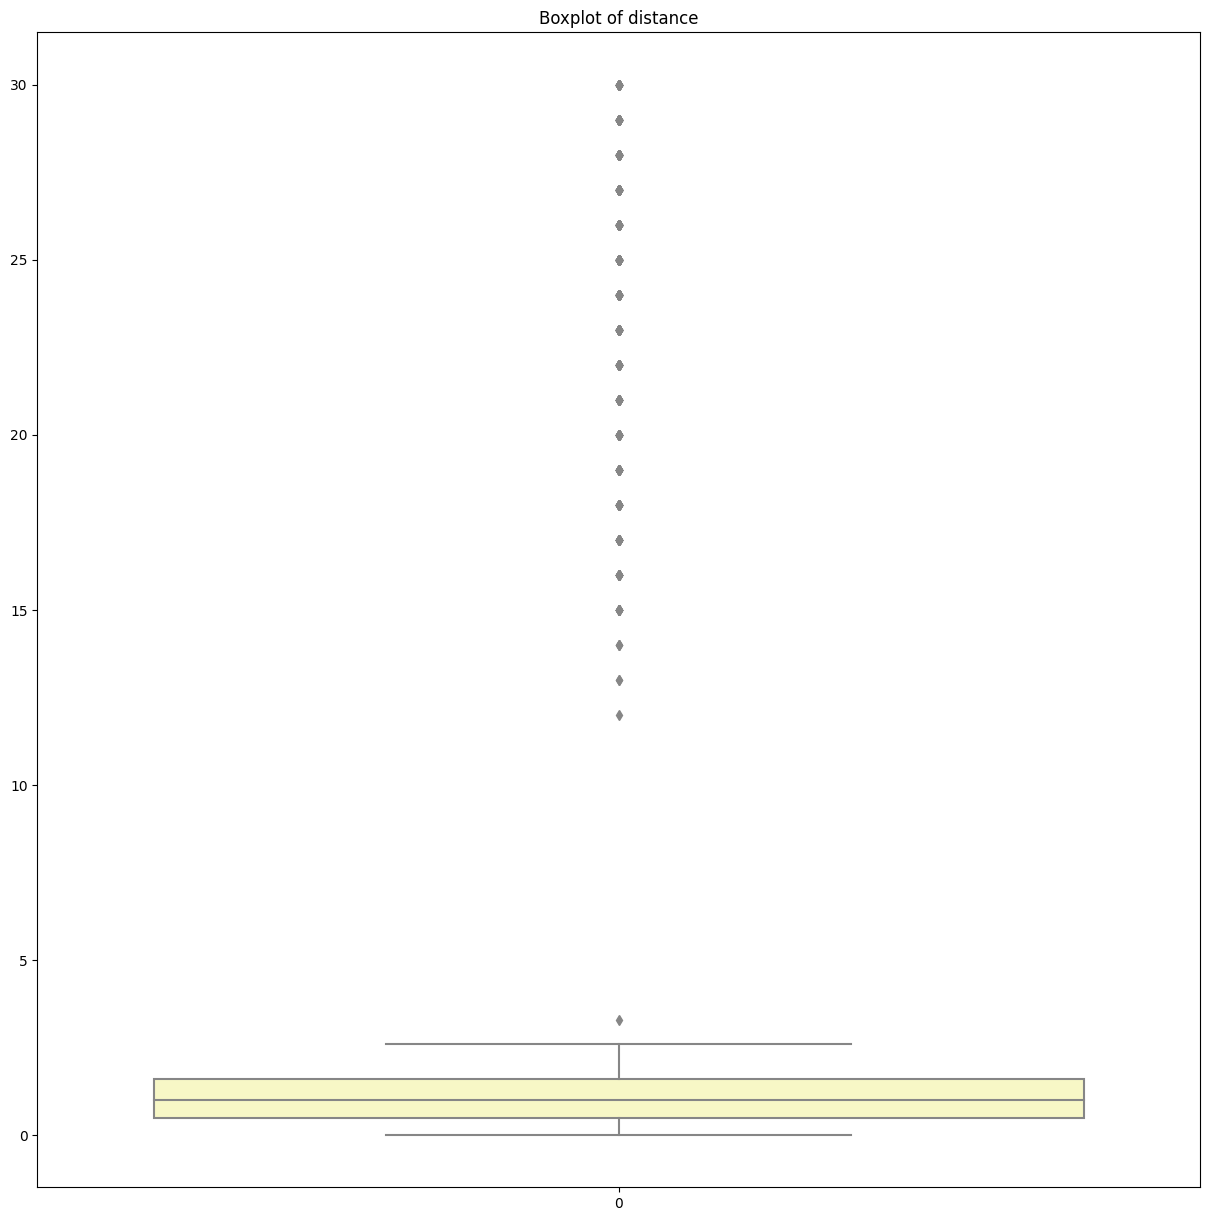

In [93]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df['distance'], palette='Spectral')
plt.title('Boxplot of distance')
plt.show()

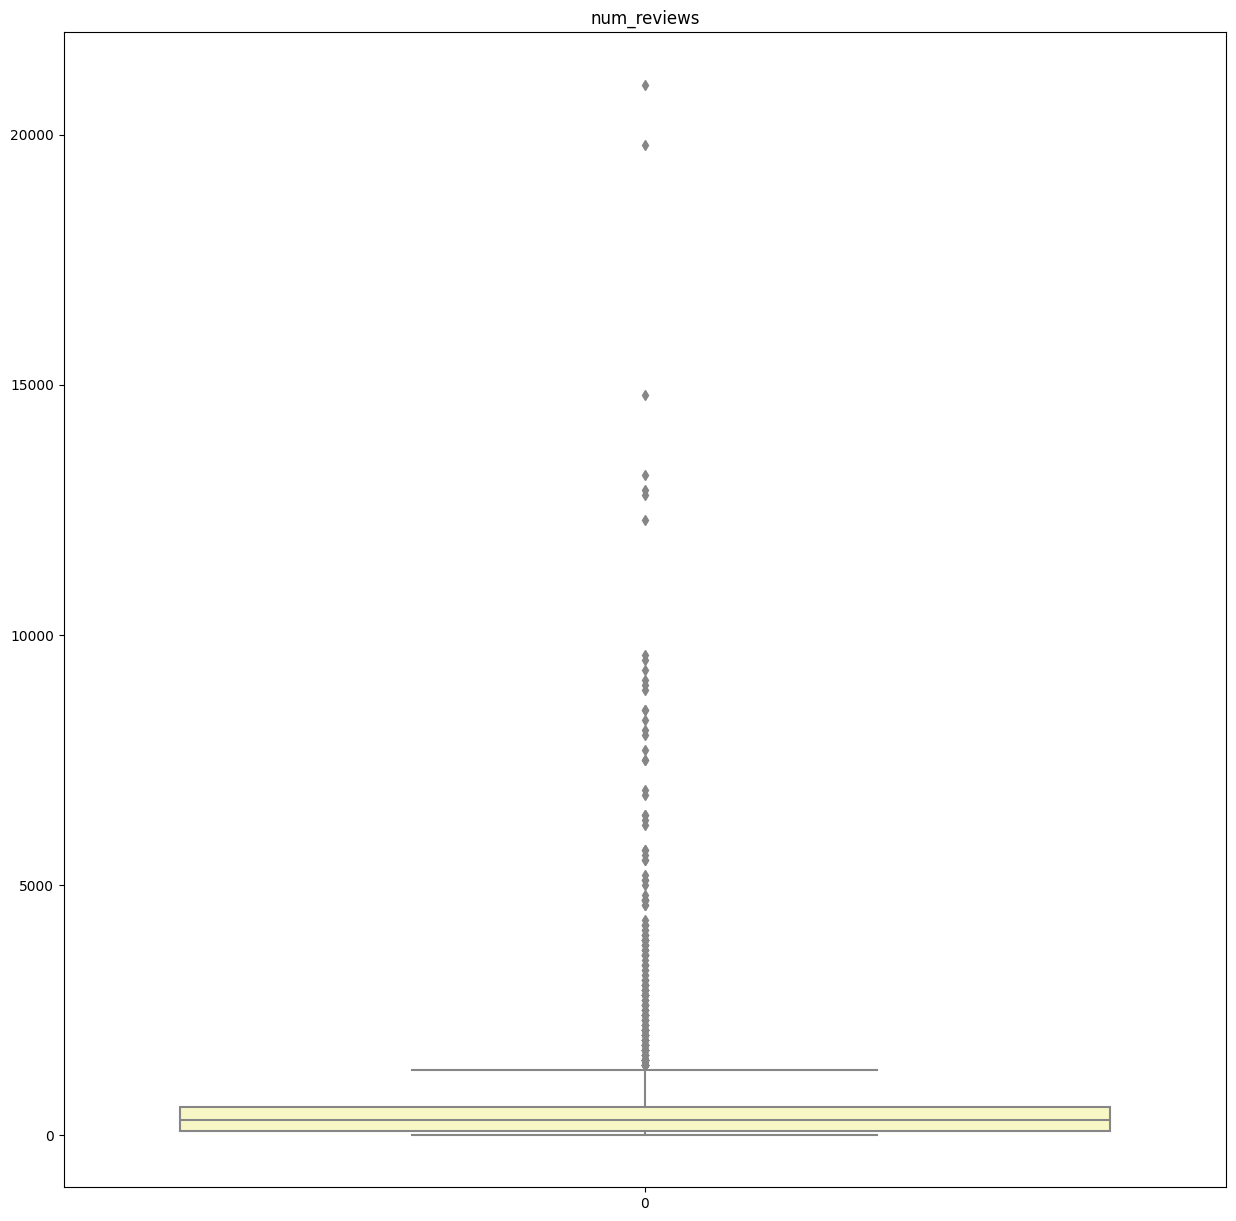

In [94]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df['num_reviews'], palette='Spectral')
plt.title('num_reviews')
plt.show()

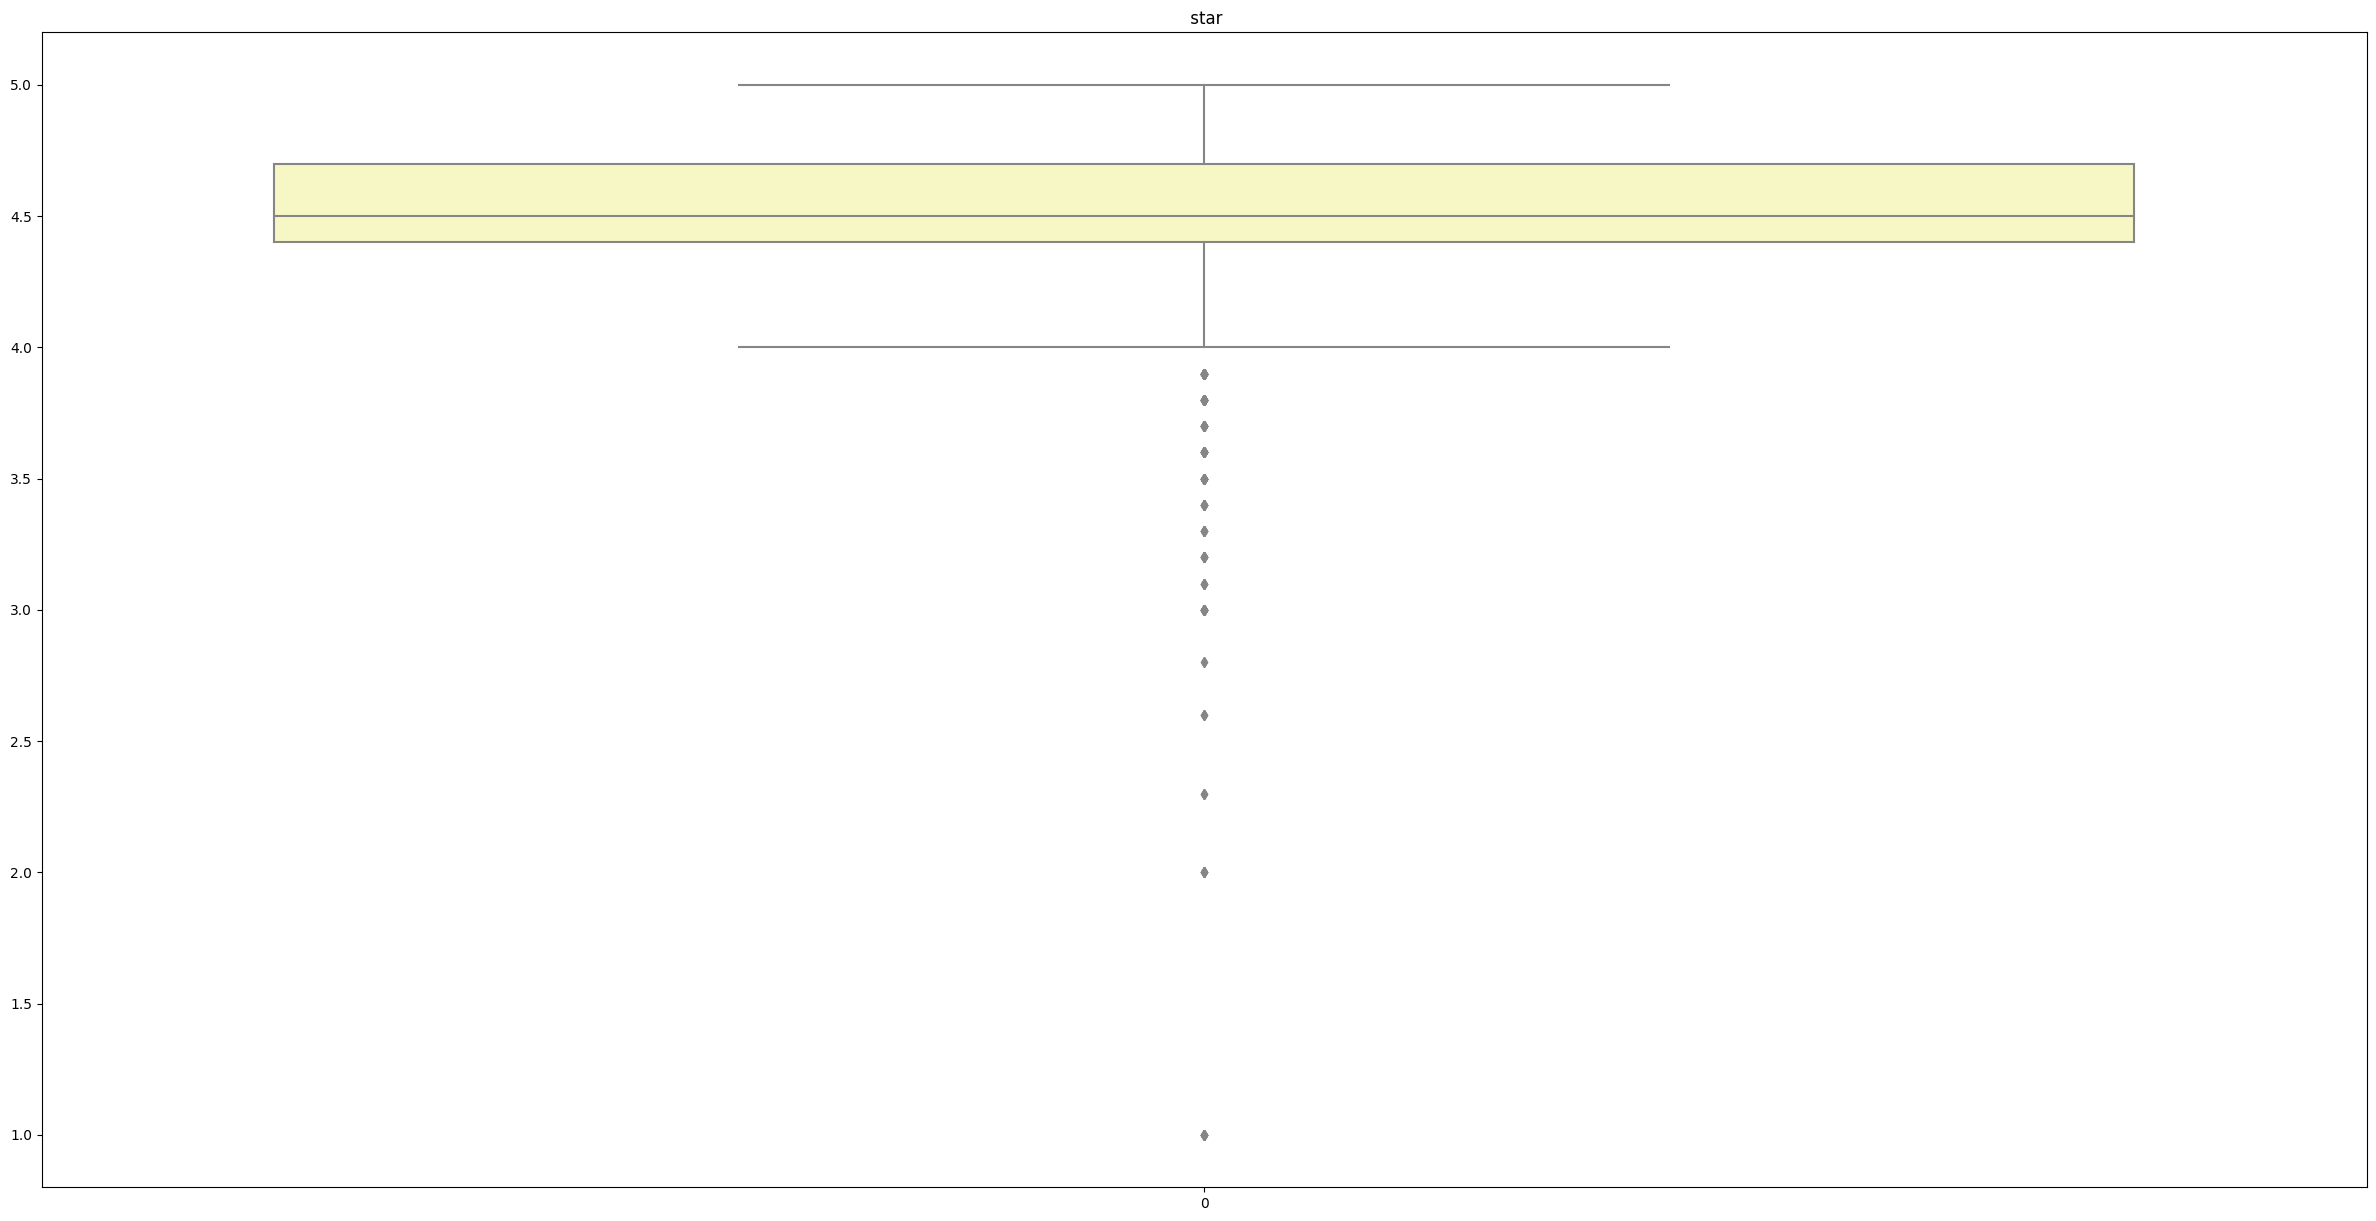

In [95]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df['star'], palette='Spectral')
plt.title(' star')
plt.show()

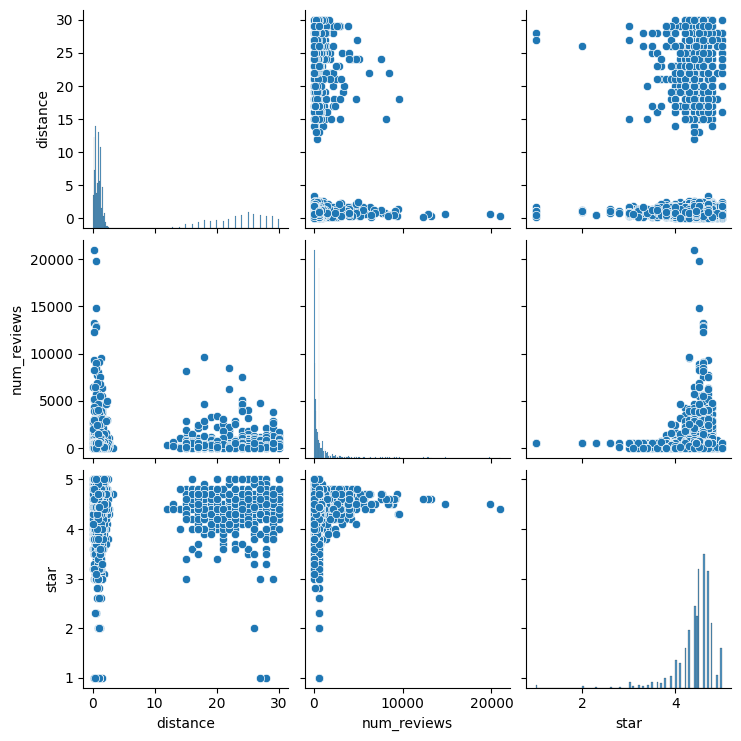

In [96]:
sns.pairplot(df[['distance','num_reviews','star']])

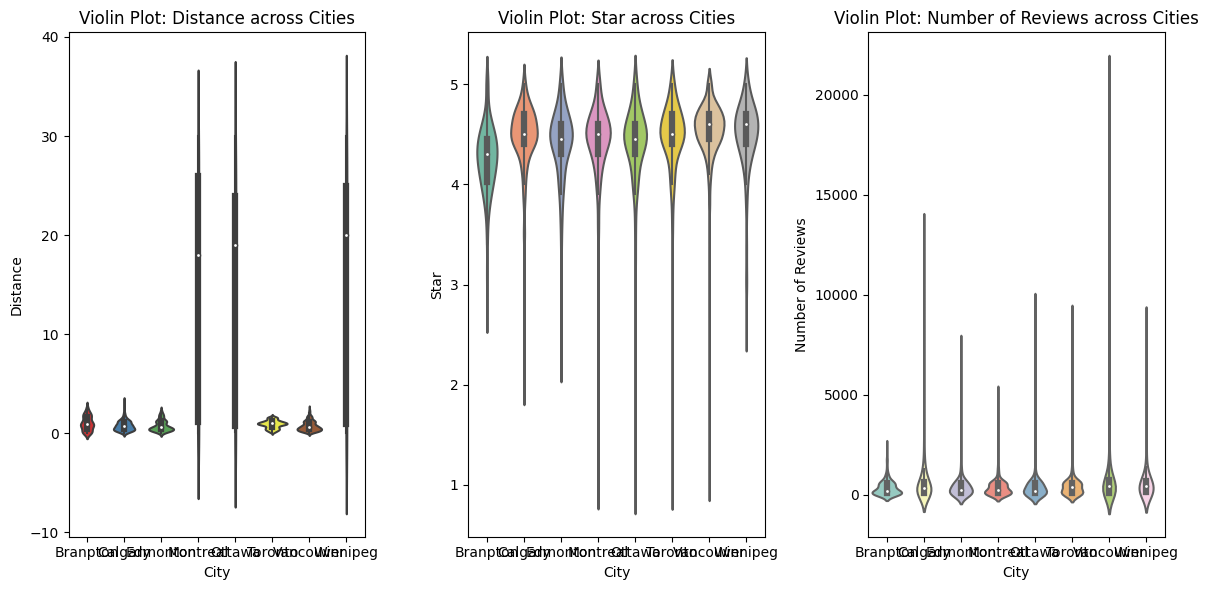

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame 'df' containing restaurant data
# If not, load the data into 'df' using your preferred method

# Plot violin plots for 'distance', 'star', and 'num_reviews' across different categories (e.g., cities)
plt.figure(figsize=(12, 6))

# Violin plot for 'distance'
plt.subplot(1, 3, 1)
sns.violinplot(x='city', y='distance', data=df, palette='Set1')
plt.xlabel('City')
plt.ylabel('Distance')
plt.title('Violin Plot: Distance across Cities')

# Violin plot for 'star'
plt.subplot(1, 3, 2)
sns.violinplot(x='city', y='star', data=df, palette='Set2')
plt.xlabel('City')
plt.ylabel('Star')
plt.title('Violin Plot: Star across Cities')

# Violin plot for 'num_reviews'
plt.subplot(1, 3, 3)
sns.violinplot(x='city', y='num_reviews', data=df, palette='Set3')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.title('Violin Plot: Number of Reviews across Cities')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()


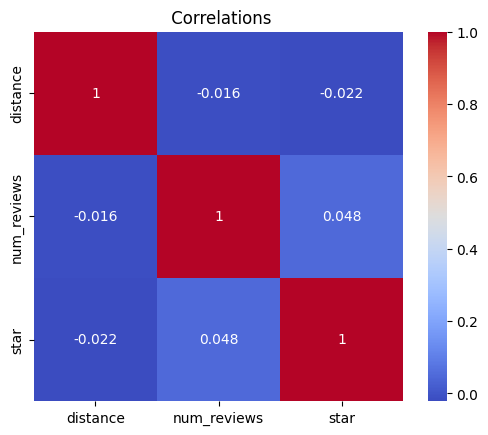

In [98]:
compare_columns = ['distance', 'num_reviews', 'star']
correlations = df[compare_columns].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', square=True)
plt.title(' Correlations')
plt.show()